# Import Libraries

In [67]:
# Command Print In coloers 
from termcolor import cprint

#Working With DataFrame
import pandas as pd

# Models Libery
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

# Help With warnings
import warnings

# Libraries For Createing Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Python Structs Type Calculats Wide Variety Mathematical Operations Like Arrays
import numpy as np

In [68]:
# Read File To Pandas DataSet From Excel 
warnings.filterwarnings("ignore")
df1 = pd.read_csv('Bit_AfterClean.csv')

In [69]:
# Imports liberies for noramlize the data
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

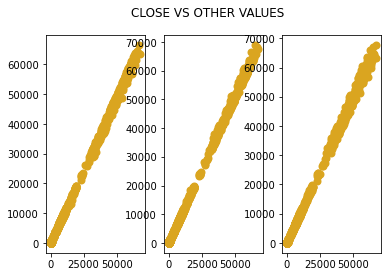

In [70]:
# Make Bitcoin Close Values Plot

fig, axs = plt.subplots(1,3)
fig.suptitle('CLOSE VS OTHER VALUES')
axs[0].scatter(df1["CLOSE"][0:3560], df1["LOW"][0:3560], color='goldenrod', lw=2)
axs[1].scatter(df1["CLOSE"][0:3560], df1["HIGH"][0:3560], color='goldenrod', lw=2)
axs[2].scatter(df1["CLOSE"][0:3560], df1["OPEN"][0:3560], color='goldenrod', lw=2)

In [71]:
# Create columns which presents the time  
DATE2 =[]
y = 3196
for i in range(0,3196):
    DATE2.append(y)
    y -=1

In [72]:
df1.drop(['Unnamed: 0'], 1, inplace=True)

# Preparing - X,y  

In [73]:
output_label = 'CLOSE'
scaler = MinMaxScaler()
X = np.array(df1.drop(output_label, axis = 1))
y = np.array(df1[output_label])

# Creating the Regression_Model Parameters 

In [74]:
# Split the dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, shuffle = False)

In [75]:
# Scales x
print("Start the model fit")
x_trains = scaler.fit_transform(x_train)

Start the model fit


In [76]:
# Scales x
y_trains = scaler.fit_transform(y_train.reshape(-1, 1))

In [77]:
model = LinearRegression()
model.fit(x_trains, y_trains)

LinearRegression()

In [78]:
# Model scoring stages   
model.score(x_test, y_test)

0.9999867812551012

In [55]:
# New dataframe for the predicti 
future_set = df1.shift(-30).head(30)
future_set = future_set.drop(output_label, axis = 1)
Prediction_Future_Test = model.predict(future_set)

# Prediction's Results

In [56]:
# Create columns which presents the time for the new dataset
DATE4 =[]
for i in range(3166,3196):
    DATE4.append(i)
future_set["Timestamp"] = DATE4
df1["Timestamp"] = DATE2

In [57]:
# Visual Predictions for next month 

Text(0, 0.5, '$ Price')

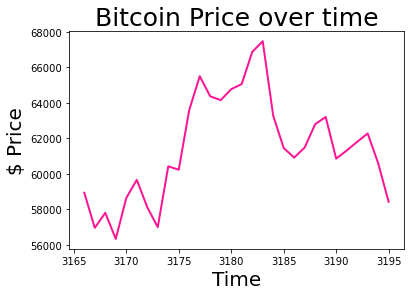

In [58]:
# Plots for next month 
plt.plot(future_set["Timestamp"], Prediction_Future_Test, color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

Text(0, 0.5, '$ Price')

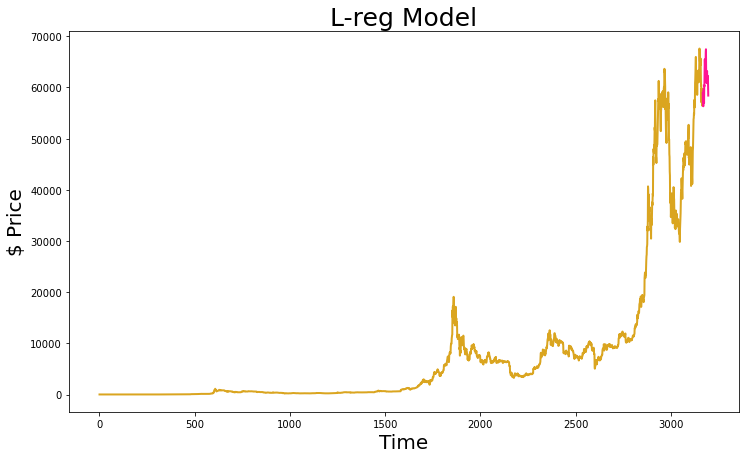

In [66]:
# Plots the Result 
plt.figure(figsize = (12, 7))
plt.plot(df1["Timestamp"][30:], df1["CLOSE"][30:], color='goldenrod', lw=2)
plt.plot(future_set["Timestamp"], Prediction_Future_Test, color='deeppink', lw=2)
plt.title("L-reg Model", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)